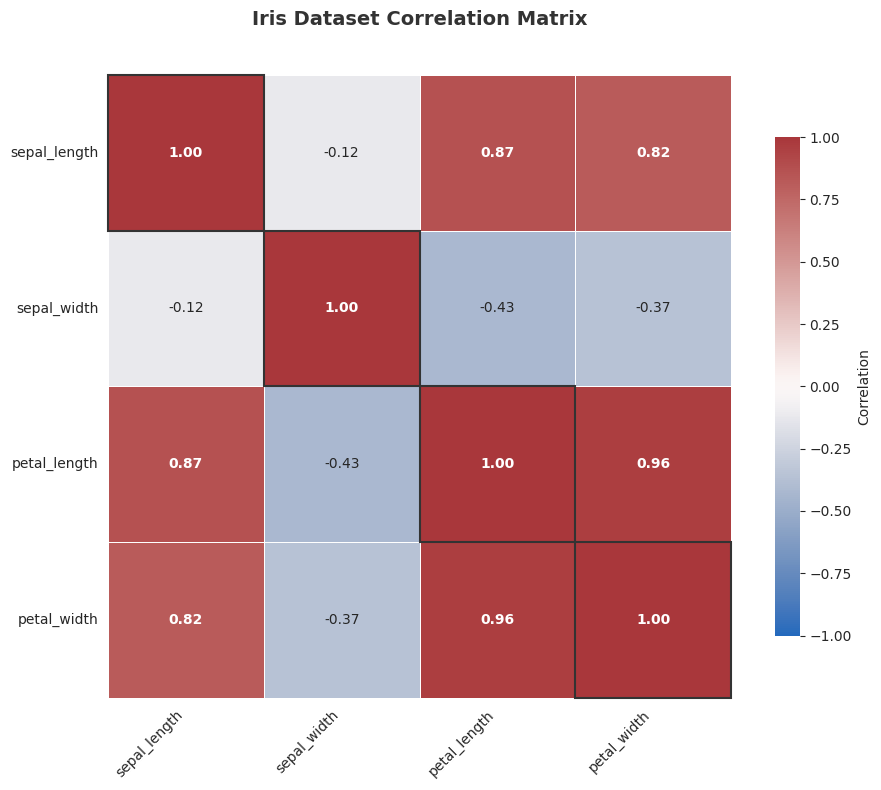

In [1]:
# Seaborn Plot - Heatmap
# Objective: Create a heatmap to visualize a correlation matrix with Seaborn, using
# advanced styling.
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load sample dataset
df = sns.load_dataset('iris')

# Calculate correlation matrix
corr = df.select_dtypes(include=np.number).corr()

# Set up the figure with custom style
plt.figure(figsize=(10, 8), facecolor='white')
sns.set_style("white", {'axes.facecolor': 'white'})

# Create heatmap with advanced styling
heatmap = sns.heatmap(
    corr,
    annot=True,                  # Show values
    annot_kws={'size': 10},      # Annotation font size
    fmt=".2f",                  # 2 decimal places
    cmap="vlag",                # Blue-red diverging colormap
    center=0,                   # Center at 0 correlation
    square=True,                # Square cells
    linewidths=0.5,             # Cell border width
    linecolor='white',          # Border color
    cbar_kws={
        'shrink': 0.8,          # Colorbar size
        'label': 'Correlation'  # Colorbar label
    },
    vmin=-1, vmax=1             # Fix color scale
)

# Customize title and labels
plt.title('Iris Dataset Correlation Matrix\n', 
         fontsize=14, pad=20, 
         fontweight='bold', 
         color='#333333')
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)

# Improve annotations - bold strong correlations
for text in heatmap.texts:
    val = float(text.get_text())
    if abs(val) > 0.7:
        text.set_fontweight('bold')
        text.set_color('white' if abs(val) > 0.8 else 'black')

# Add diagonal decorators
for i in range(len(corr)):
    heatmap.add_patch(plt.Rectangle((i, i), 1, 1, 
                       fill=False, 
                       edgecolor='#333333',
                       lw=1.5,
                       clip_on=False))

# Adjust layout
plt.tight_layout()
plt.show()